In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
data = pd.read_csv('NBAplayers.csv', sep=';', encoding='latin1', thousands=',')
data = data.dropna()

In [3]:
data['Salary'] = data['Salary'].map(lambda x: x.lstrip('$').rstrip('(1234567890)'))


In [4]:
data["Salary"] = data.Salary.str.replace(",", "").str.strip()

In [5]:
data['Salary'] = pd.to_numeric(data["Salary"])

In [6]:
data.head()

Name Position Team   Games Played  Minutes  Points  Field Goal%  \
0  Stephen Curry       PG   GSW            51     1631    1346        49.54   
1   LeBron James       SF   CLE            82     3025    2251        54.24   
2   Paul Millsap       PF   DEN            38     1143     555        46.44   
3  Blake Griffin       PF   DET            58     1969    1242        43.78   
4     Kyle Lowry       PG   TOR            78     2509    1267        42.69   

   3Point%  FreeThrow%  Assists  Blocks  Steals  Rebounds  Turnovers    Salary  
0    42.32       92.05      309       8      80       261        153  34682550  
1    36.70       73.07      747      71     116       710        348  33285709  
2    34.51       69.57      103      44      39       245         74  30769231  
3    34.47       78.48      334      18      41       428        166  29727900  
4    39.93       85.44      537      19      85       434        183  28703704

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 0 to 361
Data columns (total 15 columns):
Name            362 non-null object
Position        362 non-null object
Team            362 non-null object
Games Played    362 non-null int64
Minutes         362 non-null int64
Points          362 non-null int64
Field Goal%     362 non-null float64
3Point%         362 non-null float64
FreeThrow%      362 non-null float64
Assists         362 non-null int64
Blocks          362 non-null int64
Steals          362 non-null int64
Rebounds        362 non-null int64
Turnovers       362 non-null int64
Salary          362 non-null int64
dtypes: float64(3), int64(9), object(3)
memory usage: 45.2+ KB


In [9]:
import pandas_profiling
#pip install pandas-profiling

pandas_profiling.ProfileReport(data)

C:\Users\User\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\User\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\User\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\User\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\User\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\User\Anac

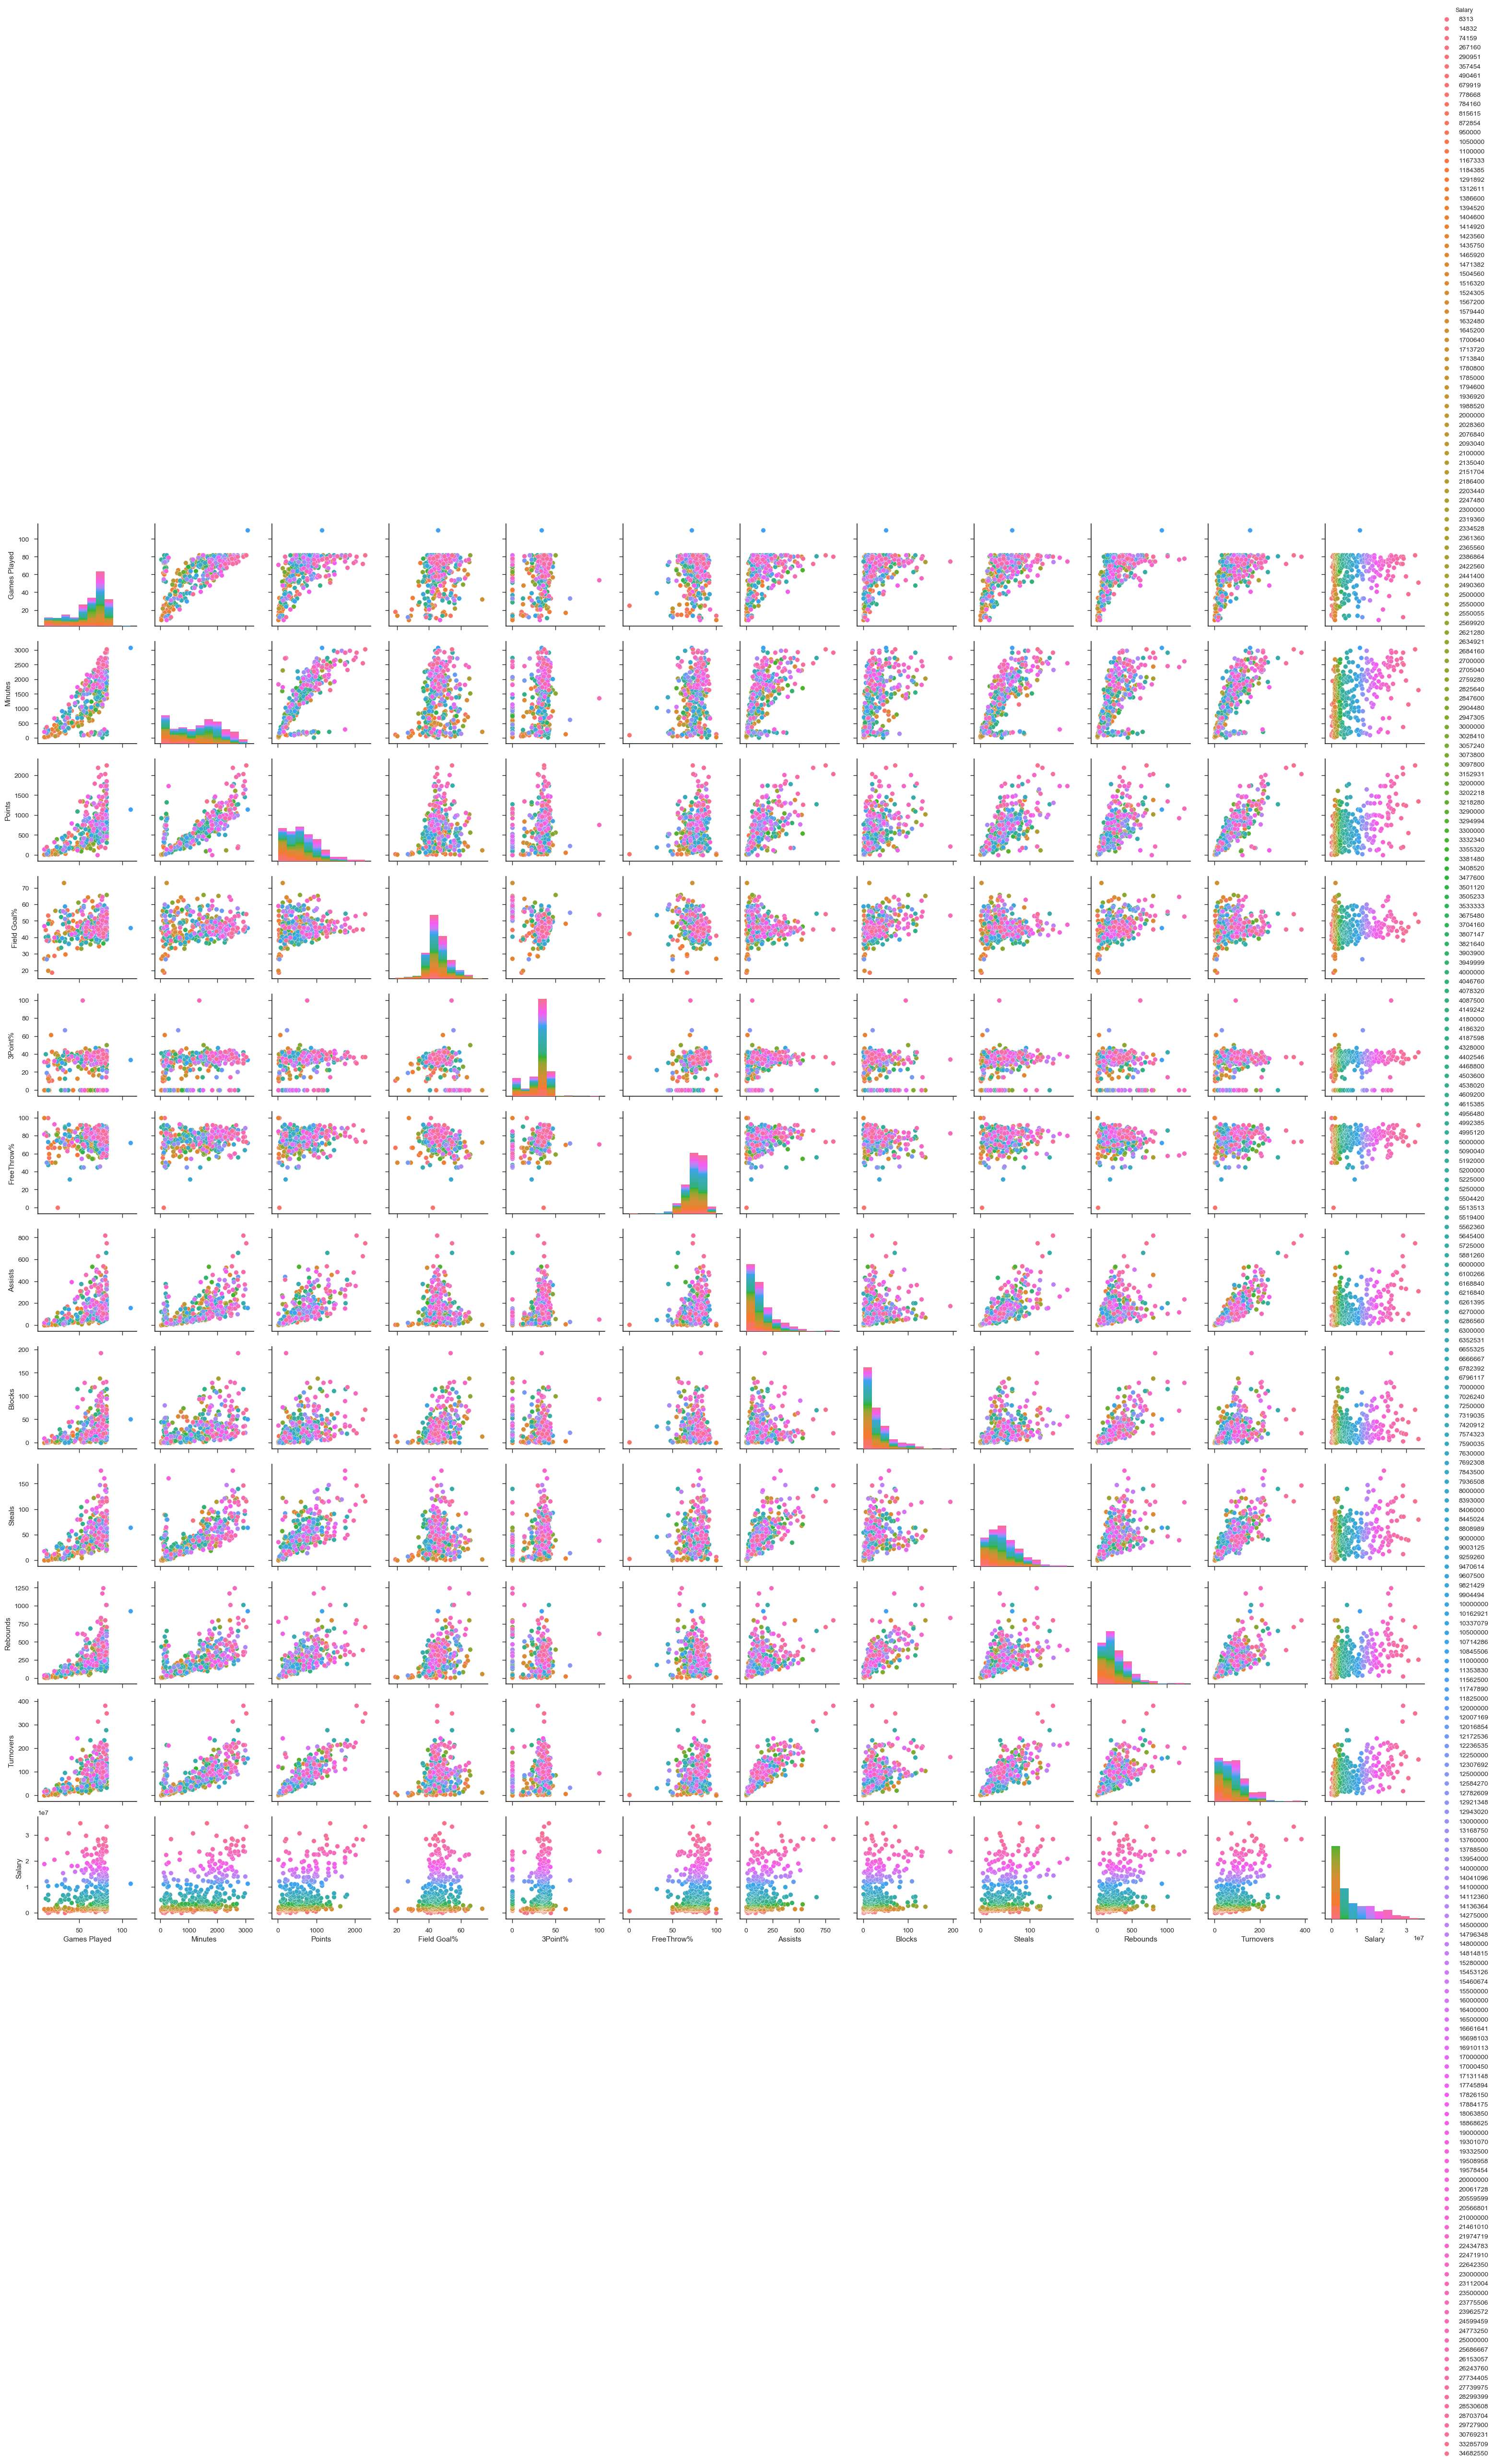

In [10]:
import seaborn as sns

sns.set(style="ticks")

sns.pairplot(data,hue="Salary")

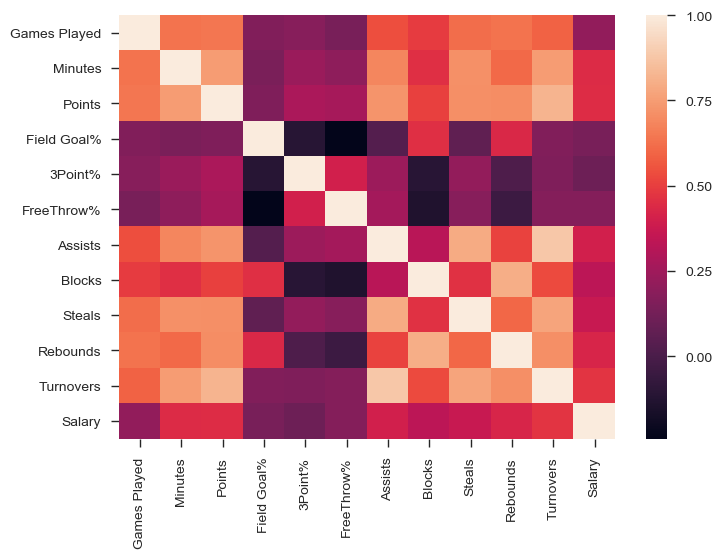

In [11]:
rela = data.corr(method = 'spearman')

sns.heatmap(rela, xticklabels = rela.columns.values, yticklabels = rela.columns.values)

# Conclusão da análise exploratória

Para a análise do nosso problema, nós pegamos um dataset com os dados mais relevantes, dentro de um jogo de basketball, da temporada 2017-2018 e comparamos com os salários dos jogadores para ver se existia alguma relação, para assim prever o próximo salário dele na temporada seguinte.

Com o auxilio do seaborn e do pandas_profiling, conseguimos montar uma análise exploratória bem eficaz, onde nós pudermos identificar que alguns dados tendem a ser relacionar mais com o ganho salarial dos jogadores do que outros, como pontos, minutos e turnovers.

Podemos justificar essa relação maior com esses dados pelo próprio jogo do jogador. Os melhores jogadores, independentemente de sua posição, normalmente são aqueles que fazem mais pontos em menos tempo, sendo assim, faz sentido deixar eles mais tempo em quadra. Em contra partida, por acabarem ficando mais tempo no jogo e com a posse de bola é natural eles cometerem um maior número de turnovers.

Os outros dados que nós analisamos tendem a se realacionar menos pelo fato de dependerem mais da posição que o jogador joga, portanto, não tendo uma conscistência muito grande entre todos os jogadores. Por exemplo, o pivô do basketball não possui a característica de atribuir um grande número de assistências e de cestas de três em um jogo, porém ele consegue pegar um maior número de rebotes em relação as outras posições.